# Mini Project — Kaggle-Style ML Challenge 

In [1]:
import pandas as pd

df = pd.read_csv("housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Dataset Understanding

In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Data Cleaning

In [3]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(
    df["total_bedrooms"].median()
)

In [4]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Feature Engineering

### Creating New Features

In [5]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

### Encoding Categorical Feature

In [6]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

### Defining Features and Target

In [7]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

### Scaling Numerical Features

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Model Building

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### XGBoost

In [12]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Model Evaluation

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
models = {"Linear": lr, "RandomForest": rf, "XGBoost": xgb}
for name, model in models.items():
    preds = model.predict(X_test)
    print(name)
    print("R2:", r2_score(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print()

Linear
R2: 0.5970176824350766
RMSE: 72668.53837868223

RandomForest
R2: 0.8065576864543786
RMSE: 50347.6458676941

XGBoost
R2: 0.830451805666127
RMSE: 47135.70579715977



### Cross-Validation

In [14]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring="r2")
cv_scores.mean()

np.float64(0.5964745065332043)

## Feature Importance

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
importances = rf.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
feat_imp.head(10)

,Feature,Importance
7,median_income,0.481661
11,ocean_proximity_INLAND,0.137520
10,population_per_household,0.121586
0,longitude,0.057939
1,latitude,0.056532
2,housing_median_age,0.044267
8,rooms_per_household,0.025967
9,bedrooms_ratio,0.024248
3,total_rooms,0.012499
4,total_bedrooms,0.012137


### Plot Feature Importance

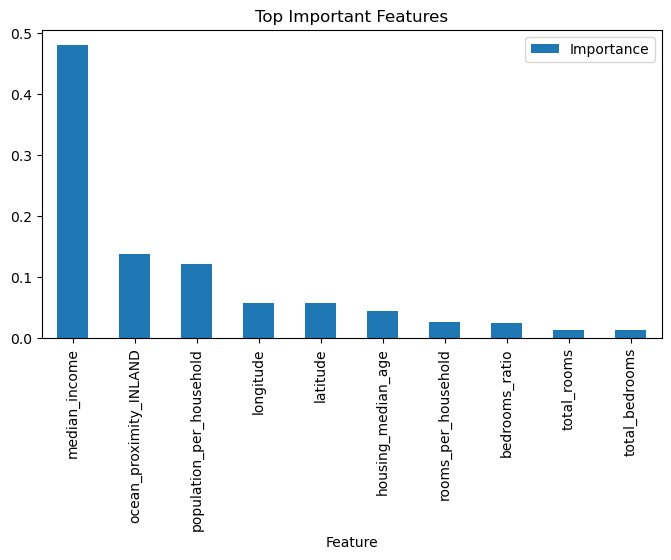

In [16]:
feat_imp.head(10).plot(
    x="Feature", y="Importance", kind="bar", figsize=(8,4)
)
plt.title("Top Important Features")
plt.show()

### Predicted vs Actual Plot

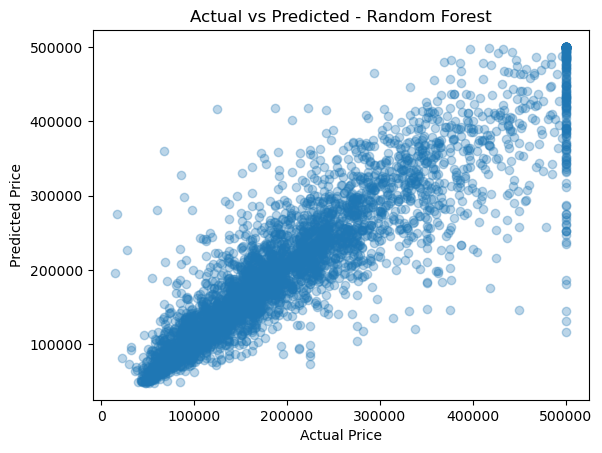

In [17]:
plt.scatter(y_test, rf.predict(X_test), alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Random Forest")
plt.show()

## Key Insights

- Median income is the most important predictor of house price.
- Houses near the ocean tend to have higher values.
- Random Forest performed better than Linear Regression.
- Feature engineering improved model performance.

## Recommendations

- Focus development near high-income areas.
- Ocean proximity significantly impacts property value.
- Ensemble models provide better accuracy than simple regression.
